# MBHdemo
Demonstration of an interactive presentation of notional LISA Massive Black Hole (MBH) data using python/Jupyter/PANDAS tools.  Data are from a set of simulated MBH searches using LDC waveforms performed by Neil Cornish. The data spans 15 weeks of consecutive observations, with weekly updates to the catalog.  A total of 12 sources are present in the data.

## 1 - Setup

In [1]:
%matplotlib inline
import sys
sys.path.append("..")

Import the LISA library to handle catalogs:

In [2]:
from lisacattools import LisaCatalogs, LisaCatalog, LisaAnalyse, FrameEnum

## 2 - Handling data from LISA

### 2.1 - Instanciate the Lisa catalogue tools

In [3]:
lisa_catalogs = LisaCatalogs("./data")

NumExpr defaulting to 8 threads.
LisaCatalogs has loaded 14 catalogs


Find help

In [4]:
help(lisa_catalogs)

Help on LisaCatalogs in module lisacattools.catalog object:

class LisaCatalogs(builtins.object)
 |  LisaCatalogs(path: str, pattern: str = 'MBH_wk*C.h5')
 |  
 |  Handling the LISA catalogs over the time
 |  
 |  Methods defined here:
 |  
 |  __init__(self, path: str, pattern: str = 'MBH_wk*C.h5')
 |      Init the loading of all the catalogs over the time according to the
 |      path of the data and the pattern to select the files to load.
 |      
 |      Args:
 |          path (str): location of the data
 |          pattern (str, optional): pattern to select the files to load. Defaults to 'MBH_wk*C.h5'.
 |  
 |  get_catalog(self, idx: int) -> lisacattools.catalog.LisaCatalog
 |      Returns a given catalog by its number in the list of LISA catalogs
 |      
 |      Args:
 |          idx (int): index of the catalog to retrieve
 |      
 |      Returns:
 |          LisaCatalog: the Lisa catalog
 |  
 |  get_catalog_by_name(self, name: str) -> lisacattools.catalog.LisaCatalog
 |     

### 2.2 - Find the list of catalogs
The catalogs are cummulative and so include sources that have completed merger in prior weeks

In [5]:
lisa_catalogs.metadata

,author,creation date,observation week,parent,location
MBHcatalog_week001,Neil Cornish,2020-12-17 18:59:07,1.0,None,./data/MBH_wk001C.h5
MBHcatalog_week003,Neil Cornish,2020-12-17 18:59:07,3.0,MBHcatalog_week001,./data/MBH_wk003C.h5
MBHcatalog_week004,Neil Cornish,2020-12-17 18:59:07,4.0,MBHcatalog_week003,./data/MBH_wk004C.h5
MBHcatalog_week005,Neil Cornish,2020-12-17 18:59:08,5.0,MBHcatalog_week004,./data/MBH_wk005C.h5
MBHcatalog_week006,Neil Cornish,2020-12-17 18:59:08,6.0,MBHcatalog_week005,./data/MBH_wk006C.h5
MBHcatalog_week007,Neil Cornish,2020-12-17 18:59:09,7.0,MBHcatalog_week006,./data/MBH_wk007C.h5
MBHcatalog_week008,Neil Cornish,2020-12-17 18:59:09,8.0,MBHcatalog_week007,./data/MBH_wk008C.h5
MBHcatalog_week009,Neil Cornish,2020-12-17 18:59:10,9.0,MBHcatalog_week008,./data/MBH_wk009C.h5
MBHcatalog_week010,Neil Cornish,2020-12-17 18:59:11,10.0,MBHcatalog_week009,./data/MBH_wk010C.h5
MBHcatalog_week011,Neil Cornish,2020-12-17 18:59:12,11.0,MBHcatalog_week010,./data/MBH_wk011C.h5


### 2.3 - Find the list of available datasets from a specific catalogue

In [6]:
MBHB007_cat = lisa_catalogs.get_catalog_by_name("MBHcatalog_week007")
datasets = MBHB007_cat.datasets
datasets

['/MBH000373540_chain',
 '/MBH001865195_chain',
 '/MBH002301433_chain',
 '/MBH004555563_chain',
 '/MBH004649957_chain',
 '/MBH005546439_chain',
 '/MBH011289993_chain',
 '/detections',
 '/metadata']

Find help

In [7]:
help(MBHB007_cat)

Help on LisaCatalog in module lisacattools.catalog object:

class LisaCatalog(builtins.object)
 |  LisaCatalog(catalog_name: str, location: str)
 |  
 |  Handling a Lisa catalog.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, catalog_name: str, location: str)
 |      Init the loading of a Lisa catalog
 |      
 |      Args:
 |          catalog_name (str): name of the catalog
 |          location (str): location of the catalog
 |  
 |  describe_dataset(self, name: str) -> pandas.core.frame.DataFrame
 |      Describes a give dataset
 |      
 |      Args:
 |          name (str): dataset name to describe
 |      
 |      Returns:
 |          pd.DataFrame: statistics information on the dataset
 |  
 |  get_attributes_from(self, ds: str) -> List
 |      Returns the attributes of the dataset.
 |      
 |      Args:
 |          ds (str): dataset name
 |      
 |      Returns:
 |          List: the list of attributes
 |  
 |  get_dataset(self, name: str) -> pandas.core.frame.DataFrame


### 2.4 - Load the detections from the final catalog
Since catalogs are cummulative, this will include all of the sources

In [8]:
final_catalog = lisa_catalogs.get_last_catalog()
final_catalog.name

'MBHcatalog_week015'

Retrieve the MBHB detections

In [9]:
detections = final_catalog.get_dataset("detections")
detections

,Parent,Log Likelihood,Mass 1,Mass 2,Spin 1,Spin 2,Merger Phase,Barycenter Merge Time,Luminosity Distance,cos ecliptic colatitude,Ecliptic Longitude,Polarization,cos inclination,Detector Merger Time,Ecliptic Latitude,chain file
name,,,,,,,,,,,,,,,,
MBH000373540,,60.282950,11191.400618,1573.347120,0.912502,0.627869,1.555474,3.735402e+05,22.205113,0.288597,2.336538,1.684530,-0.316716,373452.5,0.292761,MBH_wk015C.h5
MBH001865195,MBH001865195,164.506458,24034.822836,8748.509775,0.972429,0.918015,2.297636,1.865195e+06,95.079793,0.195796,3.250084,2.404726,-0.500549,1864860.0,0.197069,MBH_wk015C.h5
MBH002301433,,67.615841,12659.907280,3912.600441,0.961883,0.867574,1.575534,2.301434e+06,34.400859,0.373100,1.242727,1.585468,-0.013747,2301210.0,0.382348,MBH_wk015C.h5
MBH004556400,MBH004556400,243.337498,15868.967713,9036.333963,0.977598,0.962171,1.671275,4.556400e+06,28.921349,0.756914,0.471104,1.576525,-0.410775,4556105.0,0.858578,MBH_wk015C.h5
MBH004650719,MBH004650719,446.562104,22450.923508,8796.170612,0.974075,0.933973,1.493337,4.650720e+06,59.148264,-0.182069,1.626839,1.601119,0.460113,4650671.0,-0.183090,MBH_wk015C.h5
MBH005546845,MBH005546845,652.996924,13238.473697,2707.606755,0.986599,0.903154,1.673776,5.546846e+06,30.323258,0.480294,3.662275,1.810179,-0.800118,5547205.0,0.500989,MBH_wk015C.h5
MBH006058694,MBH006058694,119.338404,10349.085349,3303.282920,0.967010,0.885836,1.614070,6.058695e+06,47.235091,0.333101,1.464468,1.373326,-0.442646,6058450.0,0.339590,MBH_wk015C.h5
MBH006253789,MBH006253789,260.016246,51499.191655,5166.812496,0.990408,0.815457,1.460127,6.253789e+06,24.506354,0.592016,6.084030,1.503608,-0.374348,6253739.0,0.633558,MBH_wk015C.h5
MBH007449510,MBH007449510,72.207804,38276.504295,2615.575967,0.970797,0.368108,1.559661,7.449511e+06,100.930430,-0.682983,0.640946,1.612438,0.667808,7449392.0,-0.751839,MBH_wk015C.h5


Retrieve the sources about a specific detection

In [10]:
data_MBH000373540 = final_catalog.get_dataset("MBH000373540_chain")
data_MBH000373540

,Log Likelihood,Mass 1,Mass 2,Spin 1,Spin 2,Merger Phase,Barycenter Merge Time,Luminosity Distance,cos ecliptic colatitude,Ecliptic Longitude,Polarization,cos inclination,Detector Merger Time,Ecliptic Latitude
Iteration,,,,,,,,,,,,,,
20,62.320136,6336.580736,2448.051776,0.986817,0.988900,1.843651,373327.281045,22.920146,0.944948,2.779974,1.958317,0.633447,373475.3,1.237436
21,62.668608,6681.551220,2342.978763,0.976503,0.993212,0.515613,373339.993639,22.012640,0.958331,2.888800,0.742990,0.600547,373475.0,1.281100
22,61.673814,6255.516801,2474.477454,0.988066,0.988084,0.753119,373920.749093,24.138918,0.134058,0.525362,1.630211,-0.681191,373475.7,0.134463
23,62.483385,6253.428876,2475.152399,0.988176,0.987842,0.516031,373352.178358,32.378652,0.966917,2.952614,0.762306,0.902759,373475.1,1.312854
40,60.941539,6336.873222,2447.940833,0.987012,0.990041,1.988975,373101.213009,23.870697,0.550833,2.759748,2.388030,0.485529,373475.1,0.583362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999983,59.956963,22174.805358,973.949850,0.788165,0.853306,0.480669,373768.716595,21.876536,-0.506324,0.530157,3.072340,-0.394292,373382.3,-0.530917
1000000,59.386551,10930.613542,1600.580975,0.860006,0.973018,0.419022,373298.588304,8.588797,-0.154930,1.963567,3.131254,0.359885,373452.9,-0.155557
1000001,59.244907,18871.896786,1087.237098,0.830068,-0.141562,2.782968,373565.986205,17.981764,-0.308805,1.296088,0.060955,-0.585493,373403.6,-0.313937


## 3 - LISA Analysis
### 3.1 - On a specific catalog

In [11]:
lisa_analysis_cat = LisaAnalyse.create(final_catalog)

In [12]:
help(lisa_analysis_cat)

Help on CatalogAnalysis in module lisacattools.analyze object:

class CatalogAnalysis(AbstractLisaAnalyze)
 |  CatalogAnalysis(lisa_catalog: lisacattools.catalog.LisaCatalog, save_img_dir=None)
 |  
 |  Handle the analysis of one catalog.
 |  
 |  Method resolution order:
 |      CatalogAnalysis
 |      AbstractLisaAnalyze
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, lisa_catalog: lisacattools.catalog.LisaCatalog, save_img_dir=None)
 |      Init the analysis with a Lisa catalog.
 |  
 |  plot_corners(self, source_name, params, *args, **kwargs) -> NoReturn
 |      Some corners plots.
 |  
 |  plot_individual_sources(self) -> NoReturn
 |      Plot the indivual sources.
 |  
 |  plot_mbh_mergers_history(self) -> NoReturn
 |      Plot the history of observed mergers.
 |  
 |  plot_skymap(self, source, nside, system: lisacattools.utils.FrameEnum = <FrameEnum.ECLIPTIC: 'Ecliptic'>) -> NoReturn
 |      Plot skymap.
 |  
 |  -----------------------------------

#### 3.1.1 - Merger Timeline plot
plot the history of observed mergers

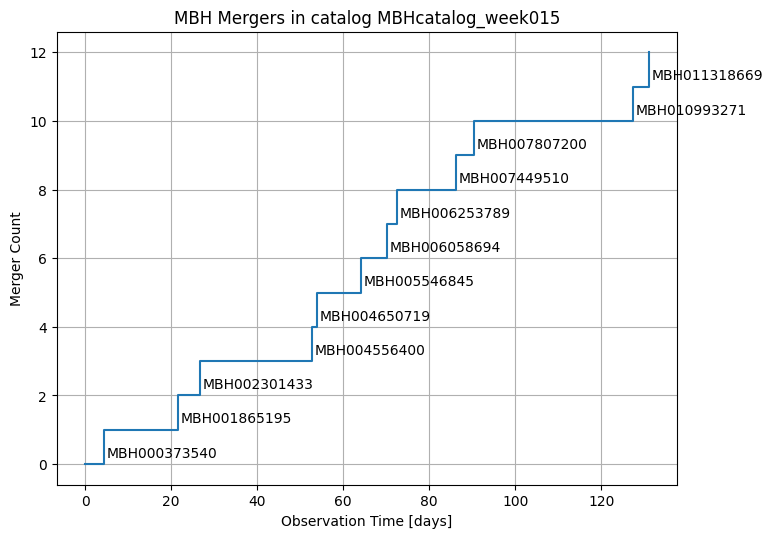

In [13]:
lisa_analysis_cat.plot_mbh_mergers_history()

#### 3.1.2 - Mass function plot
plot the catalog in the M1-M2 plane

TODO

#### 3.1.3 - Individual Source
Here we look at an indivudal source in detail using the chain files

../lisacattools/analyze.py:150: MatplotlibDeprecationWarning: The 'nonposx' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale('log', nonposx='clip')
../lisacattools/analyze.py:151: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale('log', nonposy='clip')


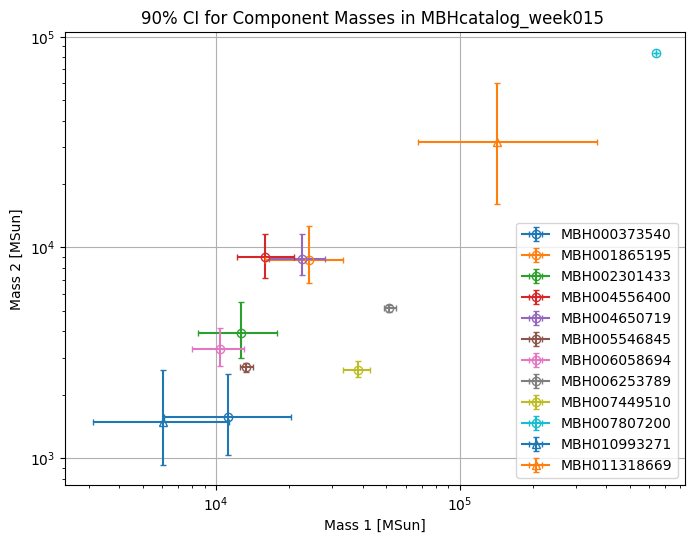

In [14]:
lisa_analysis_cat.plot_individual_sources()

In [15]:
# find attributes in the dataset "detections"
final_catalog.get_attributes_from("detections")

['Parent',
 'Log Likelihood',
 'Mass 1',
 'Mass 2',
 'Spin 1',
 'Spin 2',
 'Merger Phase',
 'Barycenter Merge Time',
 'Luminosity Distance',
 'cos ecliptic colatitude',
 'Ecliptic Longitude',
 'Polarization',
 'cos inclination',
 'Detector Merger Time',
 'Ecliptic Latitude',
 'chain file']

In [16]:
# pick out the median Log-likelihood source
final_catalog.get_median_source("detections","Log Likelihood")

,Parent,Log Likelihood,Mass 1,Mass 2,Spin 1,Spin 2,Merger Phase,Barycenter Merge Time,Luminosity Distance,cos ecliptic colatitude,Ecliptic Longitude,Polarization,cos inclination,Detector Merger Time,Ecliptic Latitude,chain file
name,,,,,,,,,,,,,,,,
MBH004556400,MBH004556400,243.337498,15868.967713,9036.333963,0.977598,0.962171,1.671275,4.556400e+06,28.921349,0.756914,0.471104,1.576525,-0.410775,4556105.0,0.858578,MBH_wk015C.h5


In [17]:
# read in the chain samples for this source
final_catalog.datasets

['/MBH000373540_chain',
 '/MBH001865195_chain',
 '/MBH002301433_chain',
 '/MBH004556400_chain',
 '/MBH004650719_chain',
 '/MBH005546845_chain',
 '/MBH006058694_chain',
 '/MBH006253789_chain',
 '/MBH007449510_chain',
 '/MBH007807200_chain',
 '/MBH010993271_chain',
 '/MBH011318669_chain',
 '/detections',
 '/metadata']

In [18]:
MBH004556400_chain = final_catalog.get_dataset("MBH004556400_chain")
MBH004556400_chain

,Log Likelihood,Mass 1,Mass 2,Spin 1,Spin 2,Merger Phase,Barycenter Merge Time,Luminosity Distance,cos ecliptic colatitude,Ecliptic Longitude,Polarization,cos inclination,Detector Merger Time,Ecliptic Latitude
Iteration,,,,,,,,,,,,,,
20,247.100397,12474.587656,11319.583855,0.987999,0.980552,1.393519,4.556400e+06,24.200780,0.748792,0.425202,0.090126,-0.407370,4556107.0,0.846237
21,246.743819,12579.310529,11227.288811,0.988141,0.980817,1.378965,4.556405e+06,26.395145,0.749332,0.455936,0.078858,-0.464405,4556107.0,0.847053
22,247.233080,12531.505298,11269.210838,0.987935,0.980836,1.386013,4.556400e+06,24.252791,0.748556,0.423196,0.082748,-0.415457,4556108.0,0.845882
23,246.564867,12558.515157,11245.460944,0.988108,0.980571,1.470348,4.556403e+06,29.920347,0.757342,0.473180,3.106241,-0.544387,4556107.0,0.859233
40,246.790310,12441.993283,11348.631598,0.987862,0.980614,1.397389,4.556400e+06,24.635505,0.747900,0.427922,0.087308,-0.410104,4556106.0,0.844893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999983,239.474705,14255.388770,9966.001914,0.996019,0.957050,1.878032,4.556290e+06,36.003854,0.893745,0.269990,2.791684,0.742820,4556110.0,1.105625
1000000,244.227938,15885.476184,9027.176340,0.981332,0.934772,2.188140,4.556407e+06,44.415508,0.758750,0.545820,2.779217,-0.898918,4556103.0,0.861392
1000001,240.179709,16252.044857,8847.907326,0.978567,0.958868,0.737360,4.556293e+06,31.985586,0.898536,0.363101,1.584137,0.637161,4556106.0,1.116421


In [19]:
MBH004556400_chain.describe()

,Log Likelihood,Mass 1,Mass 2,Spin 1,Spin 2,Merger Phase,Barycenter Merge Time,Luminosity Distance,cos ecliptic colatitude,Ecliptic Longitude,Polarization,cos inclination,Detector Merger Time,Ecliptic Latitude
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000
mean,243.044541,16060.891579,9200.176327,0.974700,0.942691,1.582866,4.556361e+06,30.493772,0.736425,0.586768,1.544360,-0.277022,4.556105e+06,0.866044
std,2.131675,2735.541588,1388.627058,0.016730,0.058331,0.890267,1.039499e+02,7.006750,0.250887,0.702498,1.091281,0.461073,3.611847e+00,0.317170
min,229.747433,11880.757283,5920.337068,0.895512,0.459896,0.000004,4.555624e+06,13.846058,-0.987734,0.000269,0.000001,-0.999990,4.556086e+06,-1.414010
25%,241.790469,13760.912572,8085.464698,0.964853,0.924413,0.834861,4.556296e+06,24.995133,0.732815,0.409720,0.340744,-0.599744,4.556102e+06,0.822450
50%,243.337498,15868.967713,9036.333963,0.977598,0.962171,1.671275,4.556400e+06,28.921349,0.756914,0.471104,1.576525,-0.410775,4.556105e+06,0.858578
75%,244.611713,18018.976450,10300.062293,0.987887,0.981661,2.231684,4.556411e+06,35.060408,0.786045,0.519386,2.679037,0.069246,4.556107e+06,0.904385
max,247.475635,26471.165354,11880.303155,0.998999,0.999000,3.141593,4.556607e+06,55.880075,0.999997,6.283170,3.141591,0.999990,4.556119e+06,1.568217


#### 3.1.4 - Make Some Corner Plots


In [20]:
import numpy as np
# we add a derived parameter which is the error in the merger time (in minutes) for nicer plotting
MBH004556400_chain['Merge Time Error'] = (MBH004556400_chain['Barycenter Merge Time']-np.median(MBH004556400_chain['Barycenter Merge Time']))/60
MBH004556400_chain

,Log Likelihood,Mass 1,Mass 2,Spin 1,Spin 2,Merger Phase,Barycenter Merge Time,Luminosity Distance,cos ecliptic colatitude,Ecliptic Longitude,Polarization,cos inclination,Detector Merger Time,Ecliptic Latitude,Merge Time Error
Iteration,,,,,,,,,,,,,,,
20,247.100397,12474.587656,11319.583855,0.987999,0.980552,1.393519,4.556400e+06,24.200780,0.748792,0.425202,0.090126,-0.407370,4556107.0,0.846237,-0.002406
21,246.743819,12579.310529,11227.288811,0.988141,0.980817,1.378965,4.556405e+06,26.395145,0.749332,0.455936,0.078858,-0.464405,4556107.0,0.847053,0.070191
22,247.233080,12531.505298,11269.210838,0.987935,0.980836,1.386013,4.556400e+06,24.252791,0.748556,0.423196,0.082748,-0.415457,4556108.0,0.845882,0.002027
23,246.564867,12558.515157,11245.460944,0.988108,0.980571,1.470348,4.556403e+06,29.920347,0.757342,0.473180,3.106241,-0.544387,4556107.0,0.859233,0.037049
40,246.790310,12441.993283,11348.631598,0.987862,0.980614,1.397389,4.556400e+06,24.635505,0.747900,0.427922,0.087308,-0.410104,4556106.0,0.844893,-0.004011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999983,239.474705,14255.388770,9966.001914,0.996019,0.957050,1.878032,4.556290e+06,36.003854,0.893745,0.269990,2.791684,0.742820,4556110.0,1.105625,-1.846593
1000000,244.227938,15885.476184,9027.176340,0.981332,0.934772,2.188140,4.556407e+06,44.415508,0.758750,0.545820,2.779217,-0.898918,4556103.0,0.861392,0.115482
1000001,240.179709,16252.044857,8847.907326,0.978567,0.958868,0.737360,4.556293e+06,31.985586,0.898536,0.363101,1.584137,0.637161,4556106.0,1.116421,-1.788931


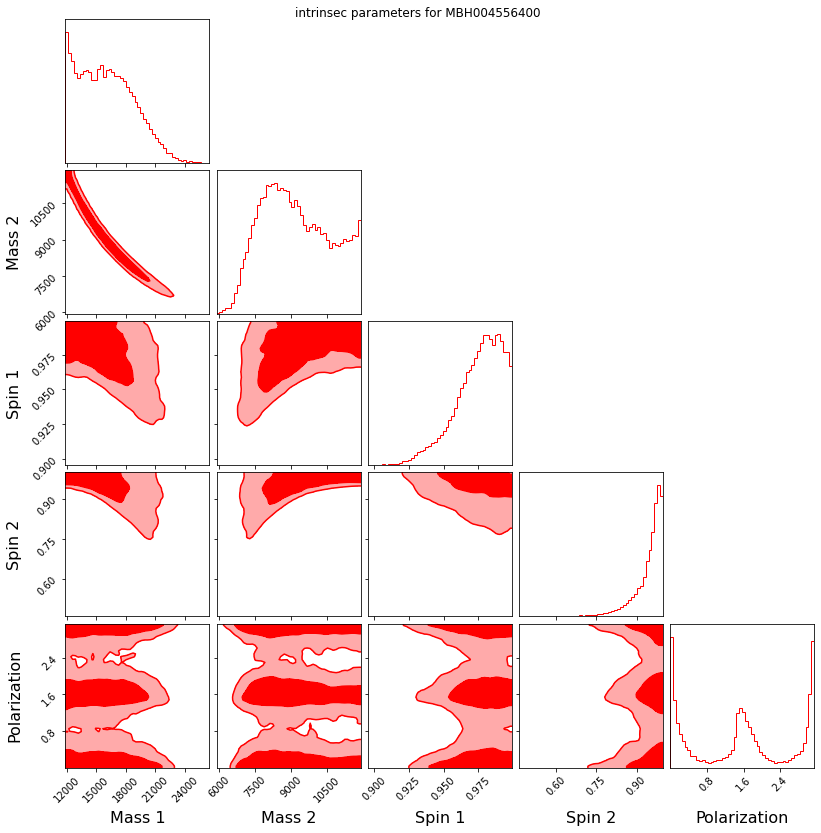

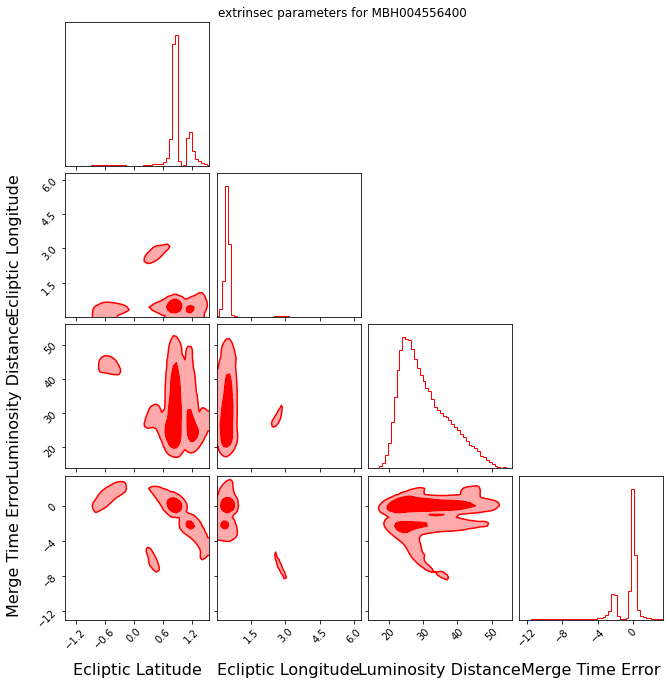

In [21]:
# intrinsec parameters
in_params = ['Mass 1','Mass 2', 'Spin 1', 'Spin 2','Polarization']
lisa_analysis_cat.plot_corners_ds(MBH004556400_chain[in_params], title="intrinsec parameters for MBH004556400")

# extrinsec parameters
ex_params = ['Ecliptic Latitude','Ecliptic Longitude','Luminosity Distance','Merge Time Error']
lisa_analysis_cat.plot_corners_ds(MBH004556400_chain[ex_params], title="extrinsec parameters for MBH004556400")

#### 3.1.5 - Make some skymaps

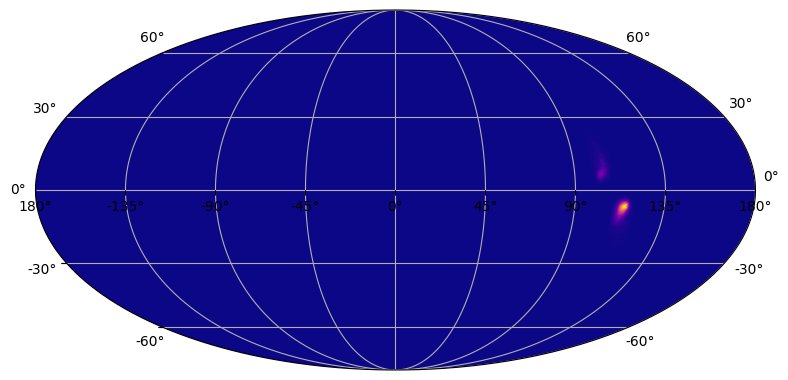

In [22]:
nside = 64
source = final_catalog.get_dataset("MBH004556400_chain")
lisa_analysis_cat.plot_skymap(source, nside, FrameEnum.GALACTIC)

### 3.2 -  Time evolution


In [23]:
lisa_analysis = LisaAnalyse.create(lisa_catalogs)

#### 3.2.1 -  History of a particular source : MBH007807200
We can use the list of catalog metadata and the "Parent" parameter for sources to trace the lineage of a particular source in our observations to see how it's parameter estimates improve over time.

In [24]:
final_catalog = lisa_analysis.lisa_catalogs.get_last_catalog()
detections = final_catalog.get_dataset("detections")
sourceIdx = detections.index.values[np.argmax(detections['Log Likelihood'])]
detections.loc[[sourceIdx]]

,Parent,Log Likelihood,Mass 1,Mass 2,Spin 1,Spin 2,Merger Phase,Barycenter Merge Time,Luminosity Distance,cos ecliptic colatitude,Ecliptic Longitude,Polarization,cos inclination,Detector Merger Time,Ecliptic Latitude,chain file
name,,,,,,,,,,,,,,,,
MBH007807200,MBH007807200,189597.62955,641359.177017,83719.952286,0.988151,0.986588,0.975498,7.807201e+06,14.897055,0.981188,4.567808,1.592036,-0.570242,7807296.0,1.376523,MBH_wk015C.h5


In [25]:
# here we take the final catalog and pick out the brightest (highest log-likelihood)
lisa_catalogs = lisa_analysis.lisa_catalogs
lineage = lisa_catalogs.get_lineage(final_catalog.name, "MBH007807200")
lineage

,Observation Week,Catalog,Parent,Log Likelihood,Mass 1,Mass 2,Spin 1,Spin 2,Merger Phase,Barycenter Merge Time,Luminosity Distance,cos ecliptic colatitude,Ecliptic Longitude,Polarization,cos inclination,Detector Merger Time,Ecliptic Latitude,chain file
name,,,,,,,,,,,,,,,,,,
MBH007768973,8.0,MBHcatalog_week008,,48.984137,3.386174e+05,135406.170776,0.402977,0.098610,1.583333,7.768974e+06,24.296544,0.027709,3.457306,1.576128,-0.625335,7769065.0,0.027712,MBH_wk008C.h5
MBH007777106,9.0,MBHcatalog_week009,MBH007768973,78.083846,2.910551e+05,154375.612285,0.528489,0.137079,1.563699,7.777106e+06,24.339080,0.031220,3.466927,1.561220,-0.628032,7777099.0,0.031225,MBH_wk009C.h5
MBH007796542,10.0,MBHcatalog_week010,MBH007777106,133.484606,5.874139e+05,88808.520575,0.862821,0.413198,1.625531,7.796543e+06,22.134774,0.040059,3.707460,1.502961,-0.570976,7796628.5,0.040070,MBH_wk010C.h5
MBH007803434,11.0,MBHcatalog_week011,MBH007796542,266.136900,9.544010e+05,63164.011657,0.903155,0.283869,1.615288,7.803434e+06,19.781345,0.059017,3.735569,1.556351,-0.529892,7803440.0,0.059052,MBH_wk011C.h5
MBH007806062,12.0,MBHcatalog_week012,MBH007803434,758.178599,1.057735e+06,58909.042640,0.910923,0.186914,1.551823,7.806063e+06,16.845382,0.316691,3.997468,1.565885,-0.479262,7806008.0,0.322239,MBH_wk012C.h5
MBH007807200,13.0,MBHcatalog_week013,MBH007806062,189597.629550,6.413592e+05,83719.952286,0.988151,0.986588,0.975498,7.807201e+06,14.897055,0.981188,4.567808,1.592036,-0.570242,7807296.0,1.376523,MBH_wk013C.h5


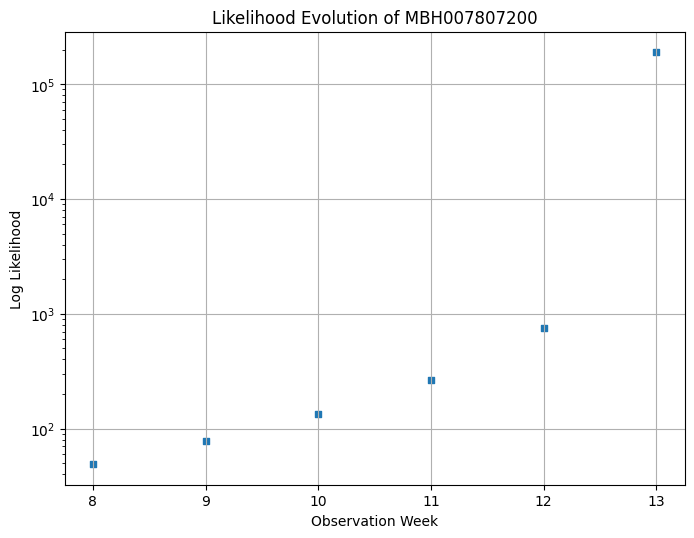

In [26]:
# as a simple example, we can plot how the log-likelihood evolves over time
lisa_analysis.plot_parameter_time_evolution(lineage, "Observation Week", "Log Likelihood", title="Likelihood Evolution of MBH007807200")

In [27]:
allEpochs_MBH007807200 = lisa_catalogs.get_lineage_data(lineage)
allEpochs_MBH007807200.describe()

,Observation Week,Mass 1,Mass 2,Spin 1,Spin 2,Ecliptic Latitude,Ecliptic Longitude,Luminosity Distance,Barycenter Merge Time,Merger Phase,Polarization,cos inclination
count,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06
mean,1.050000e+01,7.955875e+05,9.862682e+04,7.120319e-01,2.931811e-01,2.739457e-01,3.109697e+00,2.034568e+01,7.793334e+06,1.543128e+00,1.611998e+00,-1.482659e-01
std,1.707826e+00,5.977577e+05,5.059863e+04,4.153753e-01,5.981740e-01,9.145648e-01,1.647548e+00,4.762803e+00,1.977917e+04,9.244302e-01,1.029421e+00,6.517208e-01
min,8.000000e+00,2.082690e+05,1.668699e+04,-9.989222e-01,-9.989971e-01,-1.569961e+00,5.492645e-06,7.447320e+00,7.693417e+06,5.909106e-08,3.659674e-07,-9.999976e-01
25%,9.000000e+00,3.466900e+05,6.099004e+04,6.865139e-01,-1.782828e-01,-4.011538e-01,1.225139e+00,1.563269e+01,7.784509e+06,7.325813e-01,6.781738e-01,-6.555519e-01
50%,1.050000e+01,6.416204e+05,8.369287e+04,8.801240e-01,3.963749e-01,2.601743e-01,3.967882e+00,2.005958e+01,7.801874e+06,1.524985e+00,1.576160e+00,-5.636610e-01
75%,1.200000e+01,1.003959e+06,1.331723e+05,9.675655e-01,8.630812e-01,1.245425e+00,4.481708e+00,2.394017e+01,7.807196e+06,2.370647e+00,2.624719e+00,6.117174e-01
max,1.300000e+01,7.162977e+06,2.109277e+05,9.989997e-01,9.989999e-01,1.570436e+00,6.283104e+00,4.341247e+01,7.851494e+06,3.141589e+00,3.141591e+00,9.999962e-01


In [28]:
# you can also pick out some statistics for a particular week
allEpochs_MBH007807200[allEpochs_MBH007807200['Observation Week']==10].describe()

,Observation Week,Mass 1,Mass 2,Spin 1,Spin 2,Ecliptic Latitude,Ecliptic Longitude,Luminosity Distance,Barycenter Merge Time,Merger Phase,Polarization,cos inclination
count,200000.0,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,2.000000e+05,200000.000000,200000.000000
mean,10.0,8.353491e+05,103869.137429,0.802044,0.280447,0.032557,2.794737,22.180358,7.798730e+06,1.561880e+00,1.545999,-0.063235
std,0.0,7.244584e+05,54727.541053,0.199632,0.541900,0.752515,1.626349,3.875965,1.199383e+04,1.005061e+00,1.112243,0.683516
min,10.0,2.100261e+05,19858.253007,-0.562556,-0.998954,-1.566253,0.000083,8.406131,7.757398e+06,5.909106e-08,0.000008,-0.999987
25%,10.0,3.027139e+05,56798.323539,0.756950,-0.099376,-0.526267,1.099750,19.574241,7.791135e+06,5.880435e-01,0.346354,-0.657174
50%,10.0,5.874139e+05,88808.520575,0.862821,0.413198,0.040070,3.707460,22.134774,7.796543e+06,1.625531e+00,1.502961,-0.570976
75%,10.0,1.113020e+06,150009.521389,0.928814,0.736749,0.614082,4.241048,24.140209,7.805056e+06,2.480193e+00,2.756402,0.638993
max,10.0,5.580659e+06,210776.771788,0.998992,0.998983,1.568610,6.283104,40.950367,7.851494e+06,3.141584e+00,3.141586,0.999996


#### 3.2.2 - Parameters evolution
This is a good way to show evolution over many different epochs. It uses the popular seaborn package

In [29]:
# first we add a merger error time parameter in hours
allEpochs_MBH007807200['Merge Time Error'] = (allEpochs_MBH007807200['Barycenter Merge Time']-np.median(allEpochs_MBH007807200[allEpochs_MBH007807200['Observation Week']==13]['Barycenter Merge Time']))/3600
allEpochs_MBH007807200[['Merge Time Error']].describe()

,Merge Time Error
count,1.200000e+06
mean,-3.851934e+00
std,5.494215e+00
min,-3.160657e+01
25%,-6.303441e+00
50%,-1.479745e+00
75%,-1.387696e-03
max,1.230360e+01


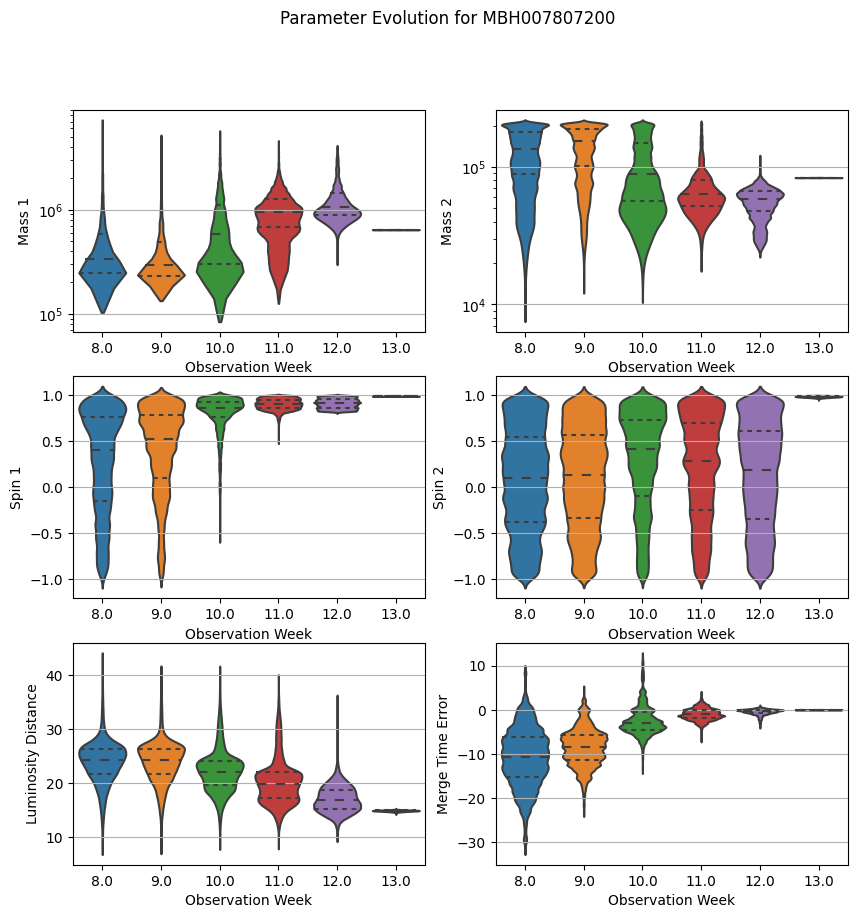

In [30]:
params = ['Mass 1', 'Mass 2', 'Spin 1', 'Spin 2', 'Luminosity Distance', 'Merge Time Error']
scales = ['log', 'log', 'linear', 'linear', 'linear', 'linear']
lisa_analysis.plot_parameters_evolution(allEpochs_MBH007807200, params, scales, title="Parameter Evolution for MBH007807200", x_title="Observation Week")

#### 3.2.3 - Time-evolving corner plot
To dig into how parameter correlations might change over time, we can look at a time-evolving corner plot

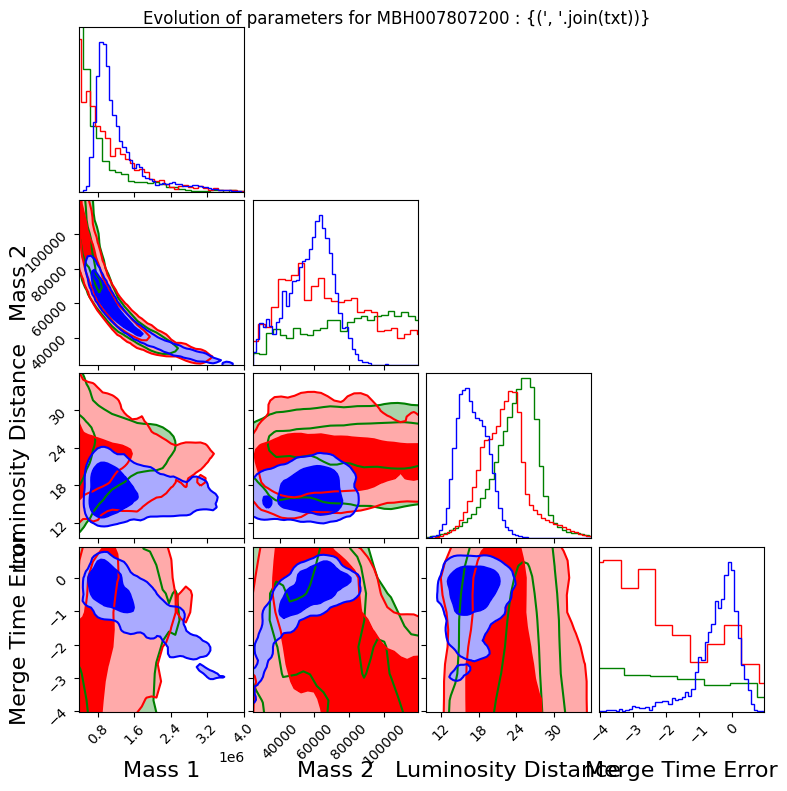

In [31]:
# pick parameters and weeks to show evolution
params = ['Mass 1','Mass 2','Luminosity Distance','Merge Time Error']
wks = [8,10,12]
colors = ['green','red','blue']
txt = list()
for week,color in zip(wks,colors):
    txt.append(f"week {week} ({color})")
title = "Evolution of parameters for MBH007807200 : {(', '.join(txt))}"

lisa_analysis.plot_parameters_correlation_evolution(allEpochs_MBH007807200, wks, params, colors, title=title)

#### 3.2.4 - Time-evolving Skymaps

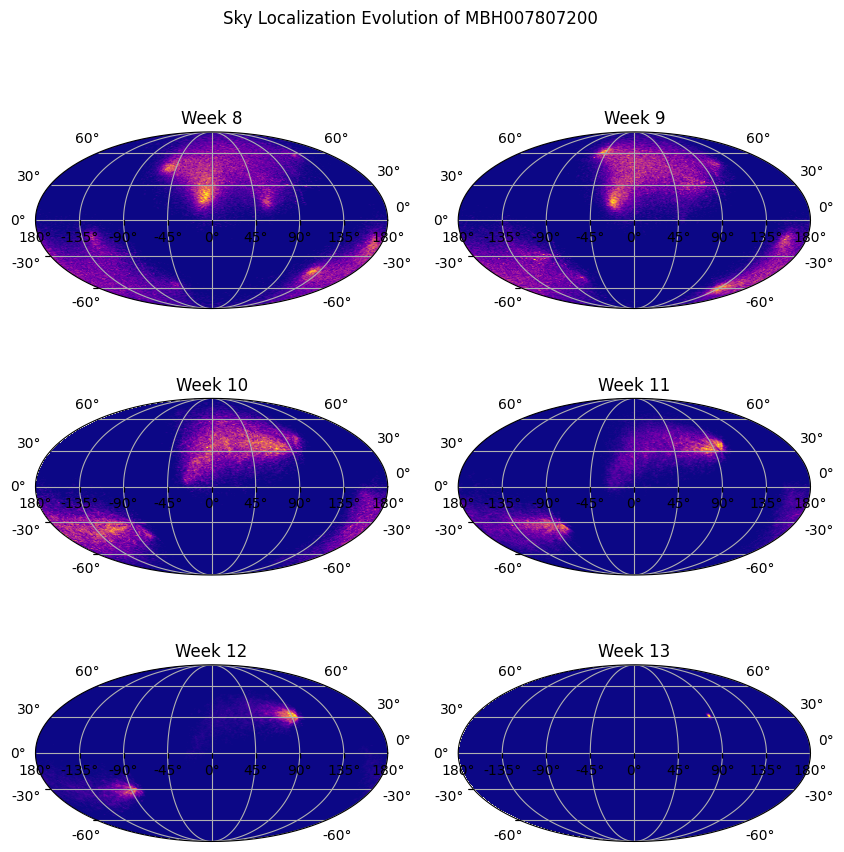

In [32]:
title = 'Sky Localization Evolution of MBH007807200'
wks = [8,9,10,11,12,13]
nside = 64
lisa_analysis.plot_skymap_evolution(nside, allEpochs_MBH007807200, wks, FrameEnum.GALACTIC,title=title)